### $ \text{imports and helper functions}$

In [3]:
import os
path = os.getcwd().removesuffix('/evaluate')
os.chdir(path)
from algorithm.model import *
import yaml
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import pytorch_lightning as pl
from algorithm import *
from helpers import *
from algorithm.metrics import get_corr

import json

acc_chance = 0.05

import matplotlib
import matplotlib.colors as clr
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.dpi"]=200

/opt/anaconda3/envs/ccSNN/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
######################################################
def get_voltages(settings,student, pre_path='', mode='test'):

    dt=settings.time_step
    student.call_outside_loop=True

    trainloader, valloader, testloader, nb_steps = choose_data_params(
        data_set_name, settings, num_workers=0,pre_path=pre_path
    ) 
    data_module = DataModule(trainloader, valloader, testloader)
    data_module.setup(stage=mode)  # make sure train/val/test data is prepared
    test_loader = data_module.test_dataloader()
    print(next(iter(test_loader)))
    test_batch = next(iter(test_loader))
    inputs, target, duration = test_batch

    mems= (-student.model.time_step/torch.log(student.model.beta)).cpu().detach().numpy() #tau_mem

    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu')
    inputs = inputs.to(device)
    target = target.to(device)
    
    student.model.eval()

    output, [mem_rec,spk_rec]=student.model.forward(inputs,target)

    return inputs, mem_rec, spk_rec, output, target, duration

######################################################

def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

######################################################

def id_to_index(ids=None):

    if ids is not None:
        indices_h=[]
        indices_in=[]
        for id in ids:
            if id in model.model.hidden_neuron_IDs:
                indices_h.append(model.model.hidden_neuron_IDs.index(id))
            if id in model.model.input_neuron_IDs:
                indices_in.append(model.model.input_neuron_IDs.index(id))
    return indices_h, indices_in



### $\text{catalog read-in, model instance, and pass thru data}$

In [ ]:
with open('neuron_catalog_1.json', 'r') as f:
    neuron_catalog_1 = json.load(f) 

with open('neuron_catalog_2.json', 'r') as f:
    neuron_catalog_2 = json.load(f) 

with open('neuron_catalog_3.json', 'r') as f:
    neuron_catalog_3 = json.load(f) 

In [5]:
#oi
data_set_name='olfactory'
i=0
j=0
teacher_params='wi'
train_params='oi'
train_loss='nll'
train_layer='hil'
pre_path = 'data/ORN_data/samples'

hil=0.0
teacher_low_rank_sparse=None
teacher_weight_init='normal'
teacher_neuron_model='LIF'#'BLK_nonsp' 'LIF'
teacher_sparsity=0.5
neuron_model='LIF'#'BLK_nonsp'
synapse_name='recurrent_synapse'
seed=None
config_path = 'fruitfly'

settings = Config(data_set_name,settings_file=config_path)
settings.weight_scaling_factor=0.3
settings.target_weights=None
weight_info=settings.train_weights,settings.Dales_law,settings.weight_init_,settings.target_weights,settings.weight_scaling_factor,settings.recurrent_sparse,settings.low_rank_sparse
neuron_synapse=f'{settings.neuron_name}_{settings.synapse.__name__}'

size_string=get_size_str(settings.batch_size,settings.nb_inputs,settings.nb_outputs)
data_module =choose_data_params(
        data_set_name, settings, num_workers=4,pre_path=pre_path
    ) 

teacher = None 
# new instance of model
model = Lightning_SNN(
        net_size=settings.net_size,
        neuron_fct=settings.neuron_fct,
        neuron_intrinsic=settings.neuron_intrinsic,
        synapse_intrinsic=settings.synapse_intrinsic,
        train_intrinsic=settings.train_intrinsic,
        clip_intrinsic=settings.clip_intrinsic,
        regularizers=settings.regularizers,
        train_out=settings.train_out,
        train_hidden=settings.train_hidden,
        weight_info=settings.weight_info,
        nr=i,
        learning_rate=settings.learning_rate,
        time_step=settings.time_step,
        optim_class=settings.optim_class,
        optim_params=settings.optim_params,
        scheduler=settings.scheduler,
        surr_grad_scale=settings.surr_grad_scale,
        adapt_intrinsic=False,#TODO
        tau_mem_LIF=settings.tau_mem,
        training_mode = settings.training_mode,
        hidden_mode=settings.hidden_mode,
        target_model = settings.target_model,
        params_from_target = settings.params_from_target,
        hidden_in_loss = settings.hidden_in_loss,
        hidden_loss_scale=settings.hidden_loss_scale,
        noise=settings.noise,
        path_info=None,
        N_train_only_weights = settings.N_train_only_weights,
        shuffle=False
    )

self.synapse intr noise is 0.0
nb hidden inside config: 7616
self.synapse_noise: 0.0
dims is False
dims is 1
shape in config tau_mem: torch.Size([552])
shape in config beta: torch.Size([552])
config wsf: 1.0
settings.batch_size: 16
lightning init device cpu
N rec = 0
N unrec = 7616
hidden in loss in SNN are None
first instance of tau_mem in SNN: torch.Size([552])
LIF model with, U_rest 0.0, rest 0.0, tau mem tensor([0.0563, 0.0617, 0.0519, 0.0630, 0.0472, 0.0648, 0.0430, 0.0732, 0.0508,
        0.0407, 0.0521, 0.0723, 0.0775, 0.0556, 0.0749, 0.0706, 0.0645, 0.0756,
        0.0744, 0.0676, 0.0450, 0.0475, 0.0297, 0.0466, 0.0207, 0.0306, 0.0234,
        0.0576, 0.0731, 0.0277, 0.0247, 0.0301, 0.0763, 0.0505, 0.0660, 0.0712,
        0.0604, 0.0499, 0.0596, 0.0408, 0.0477, 0.0526, 0.0527, 0.0345, 0.0515,
        0.0785, 0.0572, 0.0392, 0.0457, 0.0436, 0.0401, 0.0547, 0.0714, 0.0748,
        0.0697, 0.0239, 0.0441, 0.0443, 0.0382, 0.0398, 0.0366, 0.0381, 0.0687,
        0.0223, 0.0620, 0.06

/Users/jeffreyhu/Desktop/summerschool2025-ccSNN_og/projects/algorithm/config/Config.py:145: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.beta = torch.exp(-self.time_step / torch.tensor(self.tau_mem))
/Users/jeffreyhu/Desktop/summerschool2025-ccSNN_og/projects/algorithm/model/fruitfly_olf.py:283: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cell_types["primary_type"] = cell_types["primary_type"].replace(self.replace_ct)
/Users/jeffreyhu/Desktop/summerschool2025-ccSNN_og/projects/algorithm/model/fruitfly_olf.py:360: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a f

model is SNN, is_spiking True
train_intrinsic: ['I_c', 'beta']
2


train weights: True, train_intrinsic: ['I_c', 'beta']


self is student: False
init w2
scale: 1.4142135623730951, std is 0.08391813582966891
model is student: False
init w1
init v


/Users/jeffreyhu/Desktop/summerschool2025-ccSNN_og/projects/algorithm/model/fruitfly_olf.py:361: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  v_df["nt_type"] = v_df["nt_type"].replace(self.replace_nt)


fruit fly weights set up
Parameter name: I_c, requires_grad: True
Parameter name: beta, requires_grad: True
Parameter name: reset, requires_grad: False
Parameter name: nt_values, requires_grad: True
Parameter name: weight_scaling_factor, requires_grad: True
Parameter name: w2, requires_grad: True


using classification loss


train out: True, train hidden: False, self hidden mode is None


In [ ]:
input, mem_rec, spk_rec, output, target, duration = get_voltages(settings, model, pre_path=pre_path)

settings.batch_size: 16
initializing data module
(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.]],

   

In [7]:
neuron_catalog_1

{'receptors': ['720575940628660224',
  '720575940619051009',
  '720575940628553731',
  '720575940629020675',
  '720575940624384007',
  '720575940606869513',
  '720575940609228809',
  '720575940607221771',
  '720575940623302669',
  '720575940625825820',
  '720575940614037533',
  '720575940631494687',
  '720575940617166882',
  '720575940644028452',
  '720575940616921129',
  '720575940617986089',
  '720575940631429165',
  '720575940631314479',
  '720575940614996018',
  '720575940616093746',
  '720575940645576756',
  '720575940633059381',
  '720575940638818357',
  '720575940627890231',
  '720575940628619319',
  '720575940630282297',
  '720575940632633400',
  '720575940646142004',
  '720575940633509949',
  '720575940638212166',
  '720575940638867526',
  '720575940627677258',
  '720575940639080526',
  '720575940617109597',
  '720575940617232477',
  '720575940633313376',
  '720575940620574817',
  '720575940609884258',
  '720575940630257772',
  '720575940619419757',
  '720575940630462572',
  '

### $\text{data inspection}$

In [8]:
print(len(model.model.input_neuron_IDs))
model.model.input_neuron_IDs

2264


['720575940605686886',
 '720575940606165606',
 '720575940606167142',
 '720575940606227890',
 '720575940606922674',
 '720575940606949042',
 '720575940607090306',
 '720575940608044501',
 '720575940608283147',
 '720575940609040835',
 '720575940610412386',
 '720575940611357938',
 '720575940613797398',
 '720575940614037910',
 '720575940614569414',
 '720575940614586690',
 '720575940614982654',
 '720575940615708466',
 '720575940615711093',
 '720575940616526292',
 '720575940616670242',
 '720575940616934361',
 '720575940617333275',
 '720575940617486081',
 '720575940617626781',
 '720575940618080566',
 '720575940618236283',
 '720575940618533403',
 '720575940618937649',
 '720575940619340446',
 '720575940619498887',
 '720575940619528789',
 '720575940619591872',
 '720575940619873472',
 '720575940620096097',
 '720575940620101614',
 '720575940620538806',
 '720575940620687425',
 '720575940620929519',
 '720575940621098879',
 '720575940621263457',
 '720575940621335841',
 '720575940621368685',
 '720575940

In [9]:
print(len(model.model.hidden_neuron_IDs))
model.model.hidden_neuron_IDs

7616


['720575940607054770',
 '720575940627628548',
 '720575940604407468',
 '720575940638878416',
 '720575940631408199',
 '720575940604978534',
 '720575940606675804',
 '720575940626601093',
 '720575940616295069',
 '720575940646354211',
 '720575940632007983',
 '720575940617853524',
 '720575940615780353',
 '720575940622428087',
 '720575940610951577',
 '720575940614229159',
 '720575940628056375',
 '720575940604402092',
 '720575940633166151',
 '720575940622354870',
 '720575940635541623',
 '720575940631453763',
 '720575940651816950',
 '720575940624489620',
 '720575940632917217',
 '720575940618876062',
 '720575940619250785',
 '720575940650946425',
 '720575940614121147',
 '720575940622646980',
 '720575940633210475',
 '720575940620889302',
 '720575940634953055',
 '720575940628836345',
 '720575940629328591',
 '720575940630969555',
 '720575940619938998',
 '720575940611760021',
 '720575940632099212',
 '720575940627244699',
 '720575940627834359',
 '720575940622402311',
 '720575940618844353',
 '720575940

In [10]:
from collections import Counter

c1 = Counter(model.model.input_neuron_IDs)
c2 = Counter(model.model.hidden_neuron_IDs)

# intersection of counters keeps the min-counts
common = c1 & c2    

# turn it back into a flat list, with duplicates
all_overlaps = list(common.elements())
print(f"{len(all_overlaps)} total overlaps (with duplicates):", all_overlaps)

0 total overlaps (with duplicates): []


In [12]:
#remove duplicates
input_unique_IDs = remove_duplicates(model.model.input_neuron_IDs)
len(input_unique_IDs)

2113

In [13]:
#remove duplicates
hidden_unique_IDs = remove_duplicates(model.model.hidden_neuron_IDs)
len(hidden_unique_IDs)

7616

In [14]:
neuron_catalog_2.keys()

dict_keys(['ALRN', 'ORN', 'HRN', 'ALLN', 'ALPN', 'LHLN', 'LHCENT', 'class_Kenyon_cell', 'class_MBON', 'class_DAN', 'WEDPN', 'APL', 'class_olfactory'])

In [15]:
every_id=[]
for celltype,ids in neuron_catalog_1.items():
    for id in ids:
        every_id.append(id)
overlapping=[id for id in model.model.input_neuron_IDs if id in every_id]

len(overlapping)

2264

In [16]:
input.shape

torch.Size([501, 5, 1, 2264])

### $ \text{3-level Raster Plots}$

In [42]:
def id_to_index(ids=None):

    if ids is not None:
        indices_h=[]
        indices_in=[]
        for id in ids:
            if id in model.model.hidden_neuron_IDs:
                indices_h.append(model.model.hidden_neuron_IDs.index(id))
            if id in model.model.input_neuron_IDs:
                indices_in.append(model.model.input_neuron_IDs.index(id))
    return indices_h, indices_in

        
#Shape: batch x time x neurons

def raster_query(celltypes=None, maintypes=None, subtypes=None, seed=None):
    if seed is not None:
        random.seed(seed)
    m=random.randint(0, 4) #outta 16 batches

    
    if celltypes is not None:
        for celltype in celltypes:
            in_spikes = None
            h_spikes  = None

            indices_h, indices_in = id_to_index(ids=neuron_catalog_1[celltype])
            indices_h=remove_duplicates(indices_h)
            indices_in=remove_duplicates(indices_in)
            print(f'input {len(indices_in)}')
            print(f'hidden {len(indices_h)}')

            plt.figure()
            plt.title(str(celltype))
            plt.xlabel('time')
            plt.ylabel('neuron index')

            if len(indices_in) > 0 and len(indices_h) == 0:

                in_spikes=input[:, m, 0, indices_in] # input.shape -> (501, 5, 1, 2264)
                in_spikes=np.swapaxes(in_spikes, 0, 1)

                plt.imshow(in_spikes, cmap='binary',  aspect='auto', interpolation='None')

            if len(indices_in) == 0 and len(indices_h) > 0:

                h_spikes = spk_rec[m, :, indices_h].detach().cpu().numpy()  
                h_spikes=np.swapaxes(h_spikes, 0, 1)

                plt.imshow(h_spikes, cmap='binary',  aspect='auto', interpolation='None')
                
            if len(indices_in)>0 and len(indices_h)>0:

                in_spikes=input[:, m, 0, indices_in] # input.shape -> (501, 5, 1, 2264)
                in_spikes=np.swapaxes(in_spikes, 0, 1)

                h_spikes = spk_rec[m, :, indices_h].detach().cpu().numpy()  
                h_spikes=np.swapaxes(h_spikes, 0, 1)

                spikes = np.concatenate([in_spikes,h_spikes], axis=0)
                plt.imshow(spikes, cmap='binary',  aspect='auto')
    if maintypes is not None:

        for maintype in maintypes:
            in_spikes = None
            h_spikes  = None

            indices_h, indices_in = id_to_index(ids=neuron_catalog_2[maintype])
            print(len(indices_in))
            print(len(indices_h))

            plt.figure()
            plt.title(str(maintype))
            plt.xlabel('time')
            plt.ylabel('neuron index')


            if len(indices_in) > 0 and len(indices_h) == 0:

                in_spikes=input[:, m, 0, indices_in] # input.shape -> (501, 5, 1, 2264)
                in_spikes=np.swapaxes(in_spikes, 0, 1)

                
                plt.imshow(in_spikes, cmap='binary',  aspect='auto', interpolation='None')


            if len(indices_in) == 0 and len(indices_h) > 0:

                h_spikes = spk_rec[m, :, indices_h].detach().cpu().numpy()  
                h_spikes=np.swapaxes(h_spikes, 0, 1)

                plt.imshow(h_spikes, cmap='binary',  aspect='auto', interpolation='None')


            if len(indices_in)>0 and len(indices_h)>0:

                in_spikes=input[:, m, 0, indices_in] # input.shape -> (501, 5, 1, 2264)
                in_spikes=np.swapaxes(in_spikes, 0, 1)

                h_spikes = spk_rec[m, :, indices_h].detach().cpu().numpy()  
                h_spikes=np.swapaxes(h_spikes, 0, 1)

                spikes = np.concatenate([in_spikes,h_spikes], axis=0)
                plt.imshow(spikes, cmap='binary',  aspect='auto', interpolation='None')

    if subtypes is not None:

        for subtype in subtypes:
            in_spikes = None
            h_spikes  = None

            indices_h, indices_in = id_to_index(ids=neuron_catalog_3[subtype])
            indices_h=remove_duplicates(indices_h)
            indices_in=remove_duplicates(indices_in)
            print(len(indices_in))
            print(len(indices_h))

            plt.figure()
            plt.title(str(subtype))
            plt.xlabel('time')
            plt.ylabel('neuron index')


            if len(indices_in) > 0 and len(indices_h) == 0:

                in_spikes=input[:, m, 0, indices_in] # input.shape -> (501, 5, 1, 2264)
                in_spikes=np.swapaxes(in_spikes, 0, 1)

                
                plt.imshow(in_spikes, cmap='binary',  aspect='auto', interpolation='None')


            if len(indices_in) == 0 and len(indices_h) > 0:

                h_spikes = spk_rec[m, :, indices_h].detach().cpu().numpy()  
                h_spikes=np.swapaxes(h_spikes, 0, 1)

                plt.imshow(h_spikes, cmap='binary',  aspect='auto', interpolation='None')
                print(h_spikes)

            if len(indices_in)>0 and len(indices_h)>0:

                in_spikes=input[:, m, 0, indices_in] # input.shape -> (501, 5, 1, 2264)
                in_spikes=np.swapaxes(in_spikes, 0, 1)

                h_spikes = spk_rec[m, :, indices_h].detach().cpu().numpy()  
                h_spikes=np.swapaxes(h_spikes, 0, 1)

                spikes = np.concatenate([in_spikes,h_spikes], axis=0)
                plt.imshow(spikes, cmap='binary',  aspect='auto', interpolation='None')
    return


$\large \text{preliminary testing}$

input 2113
hidden 267


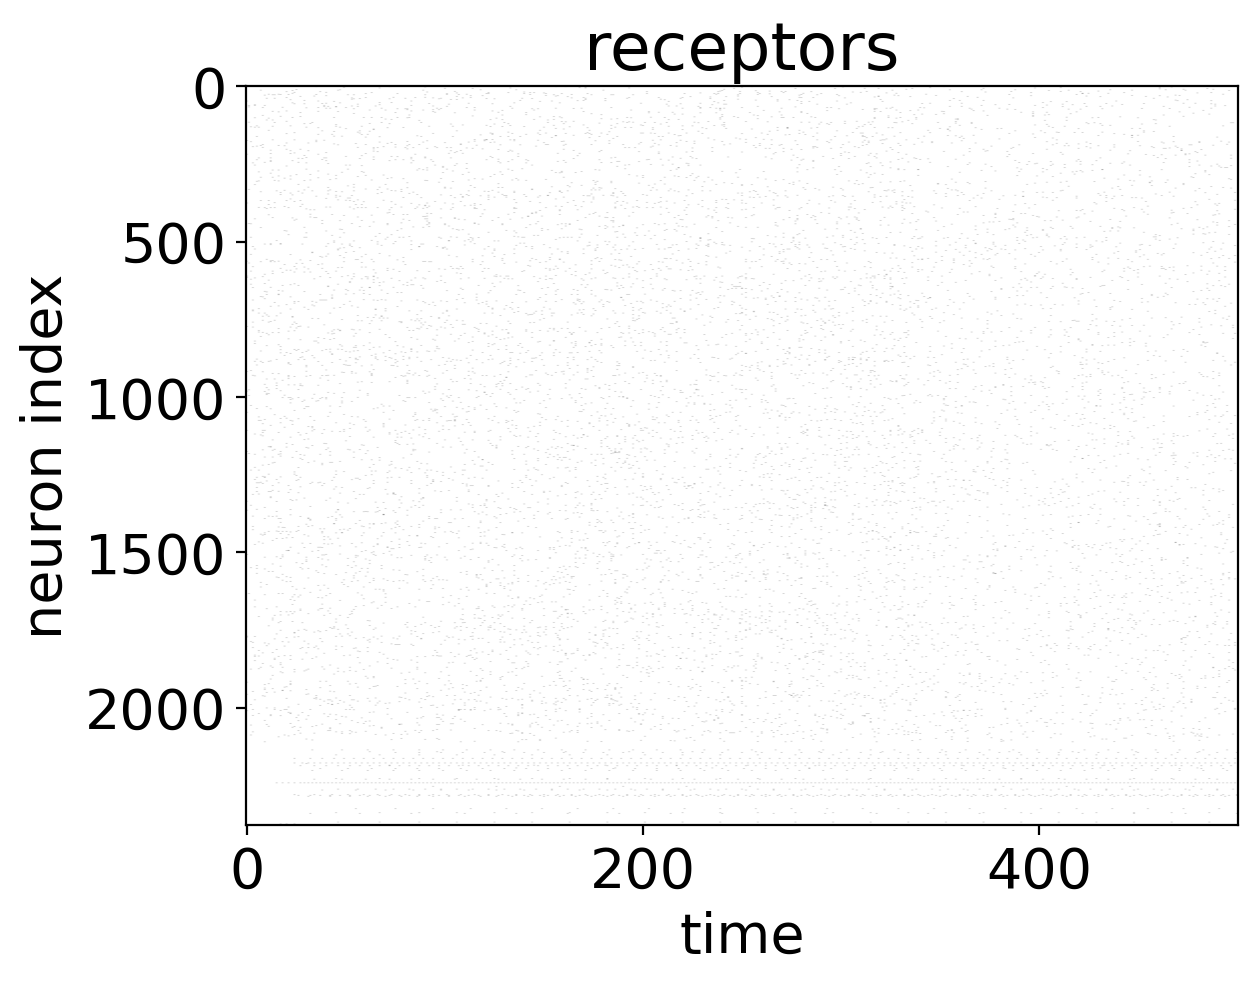

In [39]:
raster_query(celltypes=['receptors'])

2113
165
0
683
0
5177


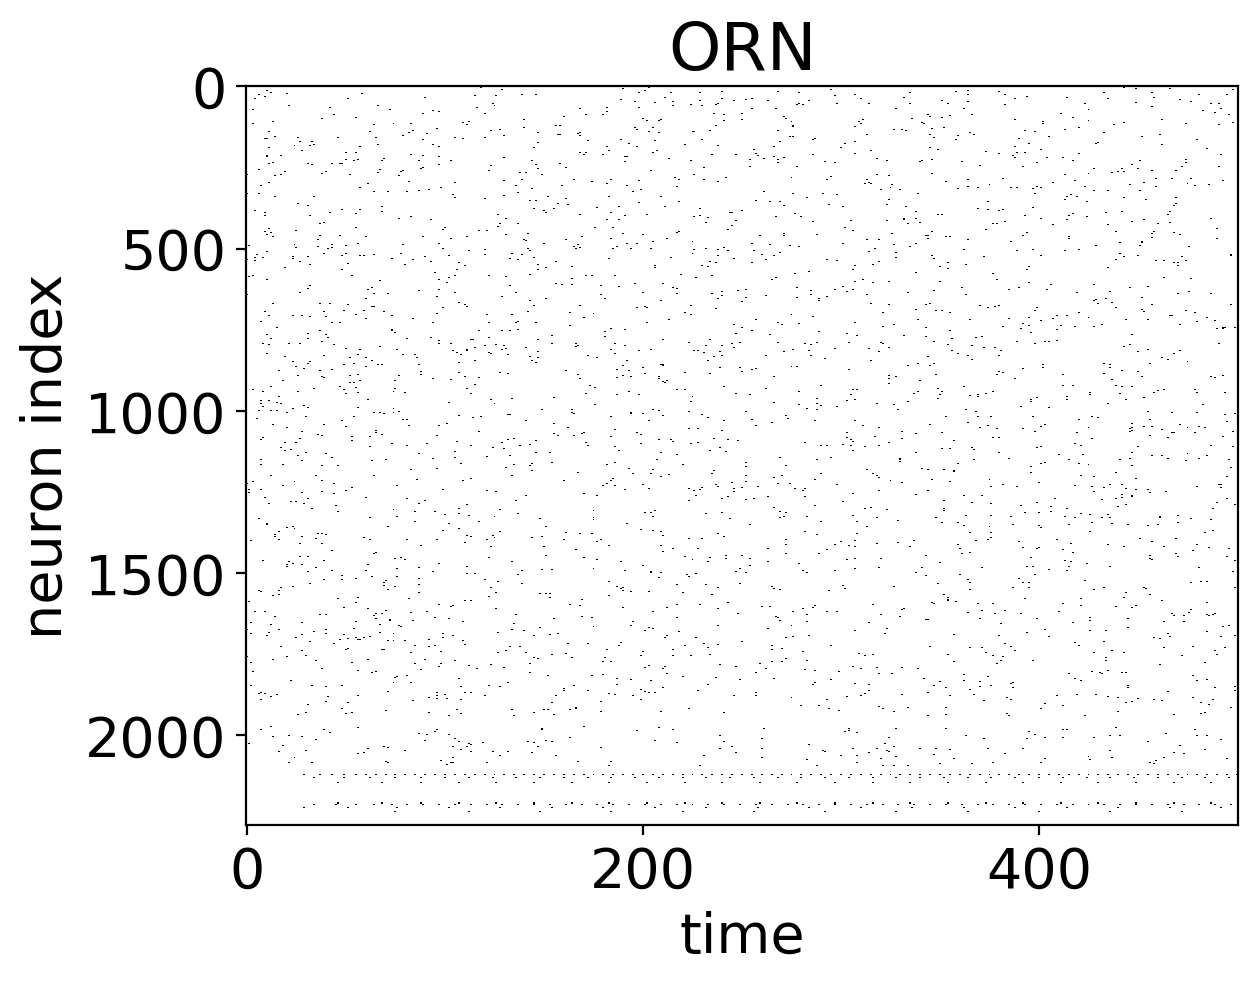

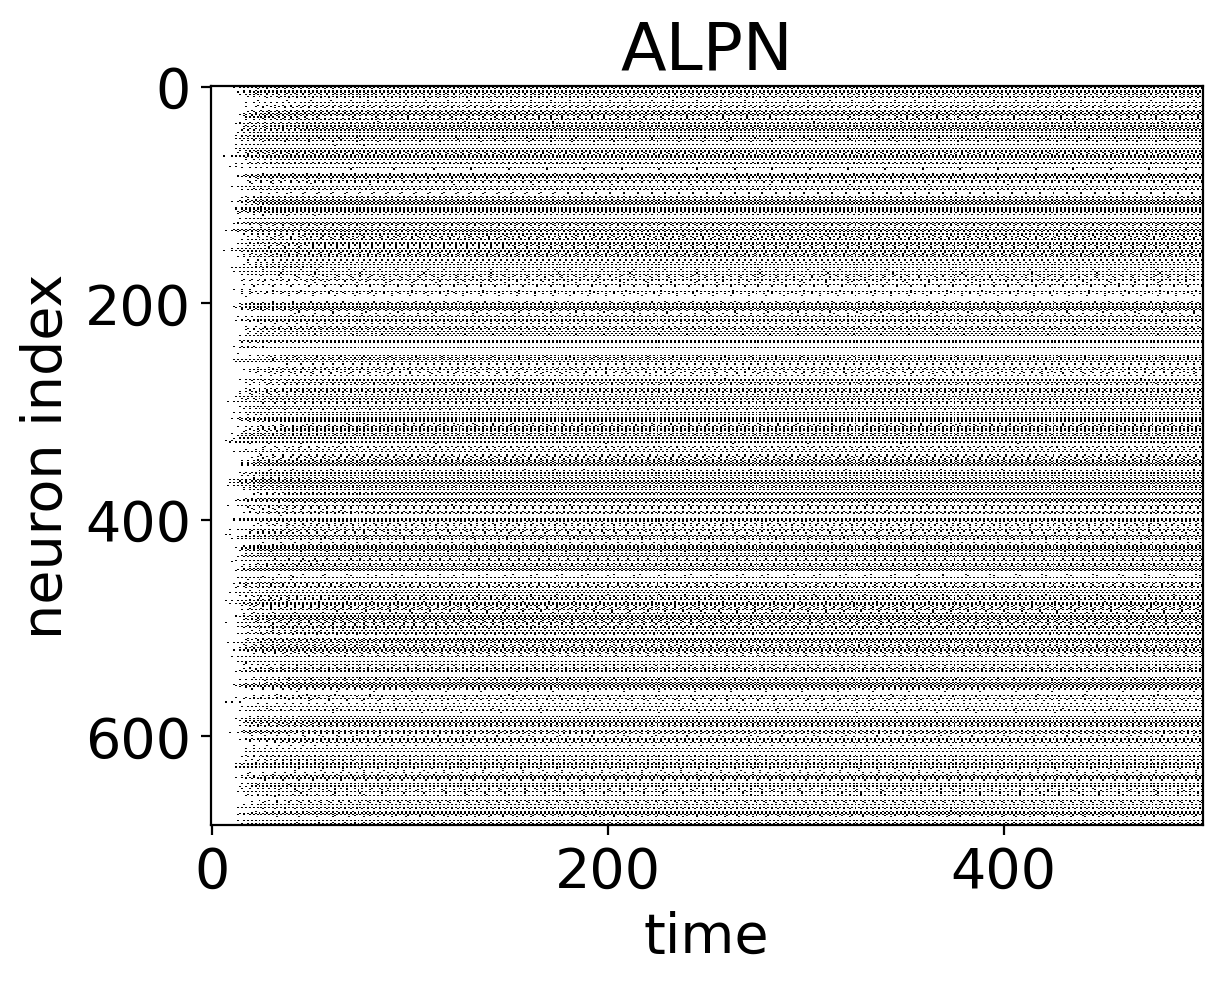

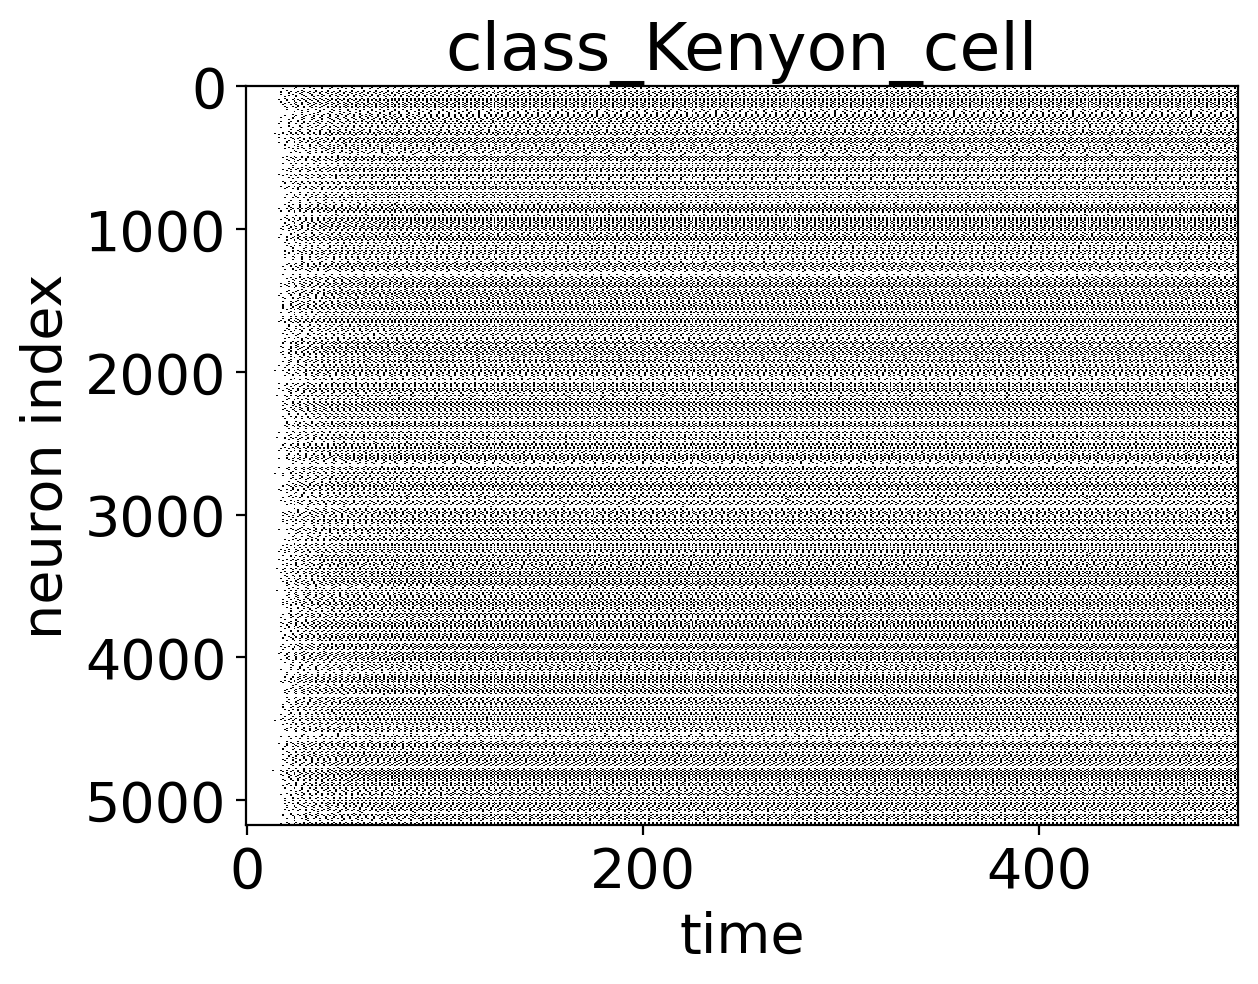

In [23]:
raster_query(maintypes=['ORN','ALPN','class_Kenyon_cell'])

67
0
0
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
0
2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


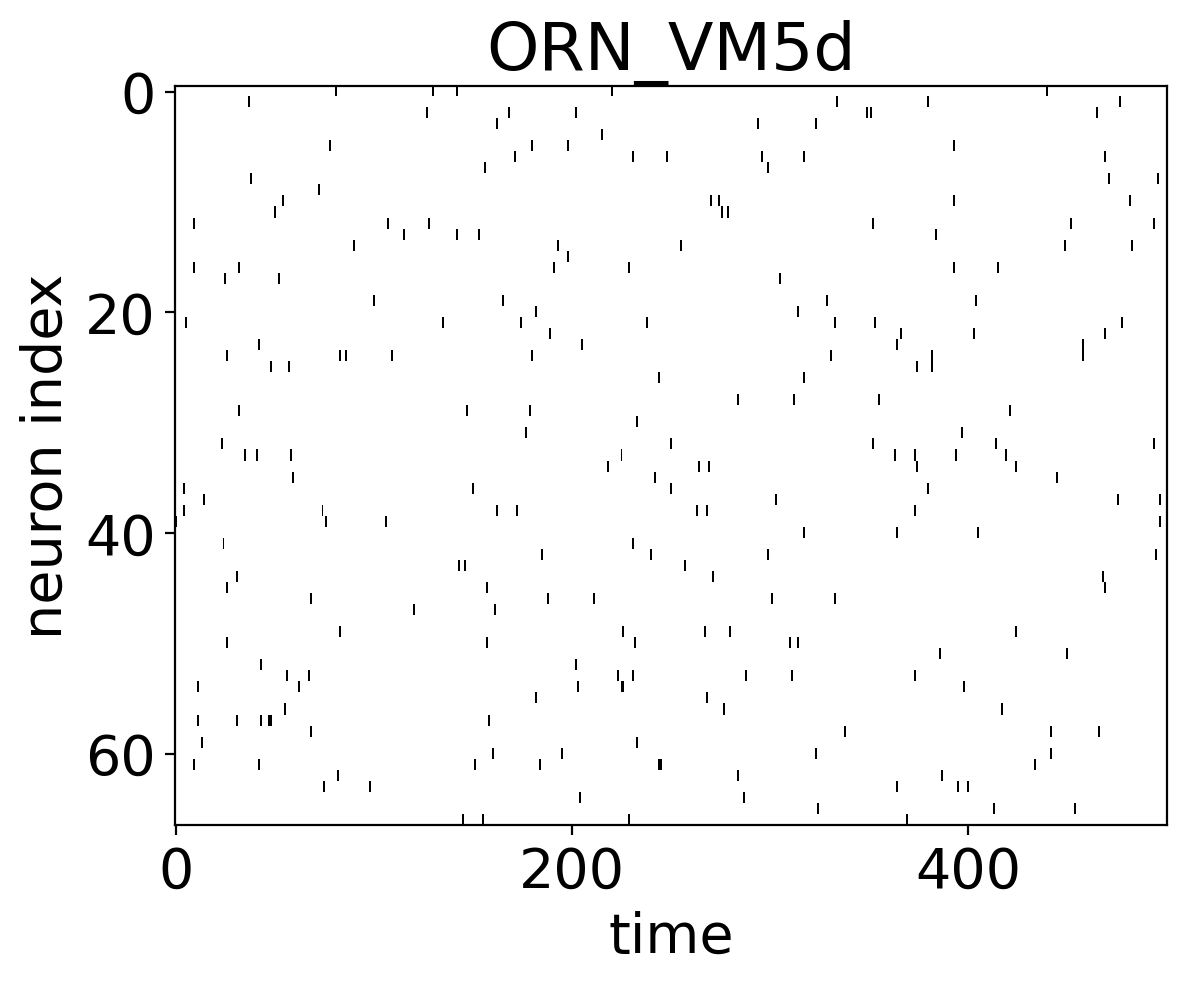

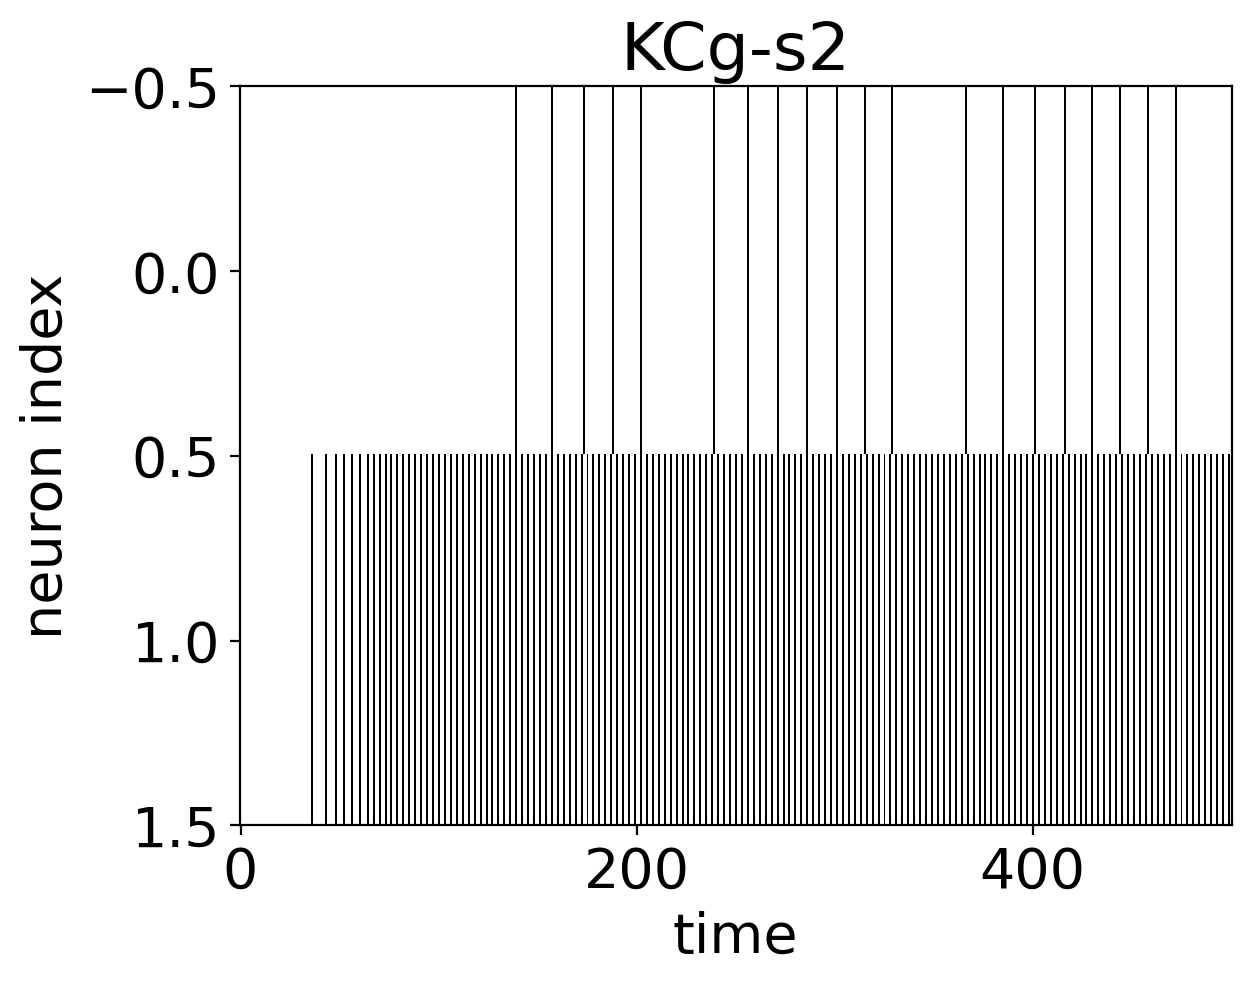

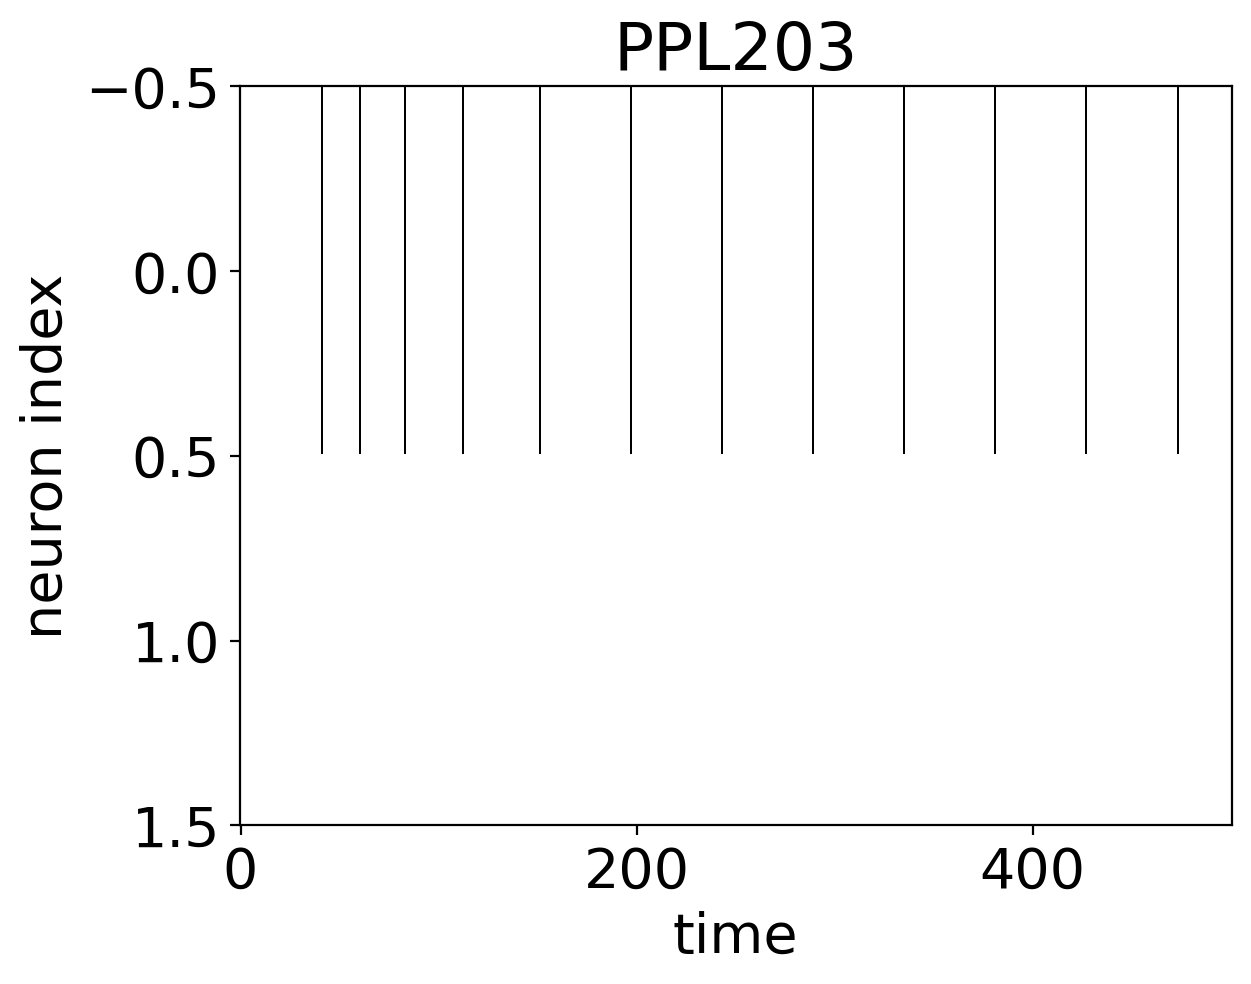

In [41]:
raster_query(subtypes=['ORN_VM5d', 'KCg-s2','PPL203'])

### $\text{KC NT Counting}$

In [ ]:
# filter connectome
# only if pre synapse and post synapse come from neurons in olfactory system (as identified above) -> use synapse
neuro_trans = conn['nt_type'].unique()


int_IDs = list(map(int, used_IDs))

#filter presynaptic
filter_pre = conn[conn['pre_root_id'].isin(int_IDs)]
#filter postsynaptic
filtered_conn = filter_pre[filter_pre['post_root_id'].isin(int_IDs)]
N_conn=len(filtered_conn)
print(f'{N_conn} connections ({np.round(N_conn/len(conn),2)} of total)')
print(f'average: {N_conn/N_neurons} connections per neuron (sparsity: {(N_conn/N_neurons**2)})')


filtered_conn.index = filtered_conn['pre_root_id']
filtered_conn = filtered_conn.drop(columns=['pre_root_id'])

filtered_conn.to_csv('filtered_conn.csv')
filtered_conn

214011 connections (0.06 of total)
average: 21.860163432073545 connections per neuron (sparsity: 0.0022329073985774815)


,post_root_id,neuropil,syn_count,nt_type
pre_root_id,,,,
720575940627737365,720575940628914436,AL_L,32,ACH
720575940619895125,720575940618561403,AL_L,31,ACH
720575940613583001,720575940623353013,MB_ML_R,9,GABA
720575940621659563,720575940609282825,AL_R,7,GABA
720575940613191591,720575940625293514,AL_L,9,GABA
...,...,...,...,...
720575940626474889,720575940623381956,MB_VL_R,1,ACH
720575940623166471,720575940623776437,MB_VL_R,1,ACH
720575940627584262,720575940624547622,SIP_L,1,ACH


In [ ]:
KC_ids=[]
for sub_KC, ids in neuron_catalog['MB']['KC'].items():
    for id in ids:
        KC_ids.append(id)
print(len(KC_ids))
KC_ids=list(set(KC_ids))
KC_ids = [int(x) for x in KC_ids]
print(len(KC_ids))
KC_nt_stats = filtered_conn[filtered_conn.index.isin(KC_ids)]['nt_type']
KC_nt_summary = KC_nt_stats.value_counts()
KC_nt_summary

5177
5177


nt_type
ACH    74391
Name: count, dtype: int64